In [5]:
import os
import torch

# Import our module containing helper functions
import gravann.polyhedral

# plotting stuff
%matplotlib notebook

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2

# If possible enable CUDA
gravann.enableCUDA()
gravann.fixRandomSeeds()
device = os.environ["TORCH_DEVICE"]
print("Will use device ", device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Available devices  1
__pyTorch VERSION: 1.13.1
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
Active CUDA Device: GPU 0
Setting default tensor type to Float32
Will use device  cuda:0


We first chose one of the following samples:

    "eros", "bennu", "itokawa", "churyumov-gerasimenko", "planetesimal", "torus", "bennu_nu", "itokawa_nu", "planetesimal_nu"

In [9]:
sample = "eros"
print("Name of the chosen body: ", sample)

mesh_vertices, mesh_faces = gravann.load_polyhedral_mesh(sample)
density = gravann.polyhedral.calculate_density(mesh_vertices, mesh_faces)

# Only for the legacy plots required
mascon_points, mascon_masses = gravann.load_mascon_data(sample)

print(f"Loaded the Mesh of {sample}")
print(f"Number of vertices: {len(mesh_vertices)}")
print(f"Number of faces (triangles): {len(mesh_faces)}")
print(f"Calculated Density: {density}")

Name of the chosen body:  eros
Loaded the Mesh of eros
Number of vertices: 7374
Number of faces (triangles): 14744
Calculated Density: 3.394506131751055


## Comparing polyhedral model & mascon model
Next, we can plot a comparison between the polyhedral gravity model's labels and the mascon labels:

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  471  points.
Right:  529  points.


<IPython.core.display.Javascript object>


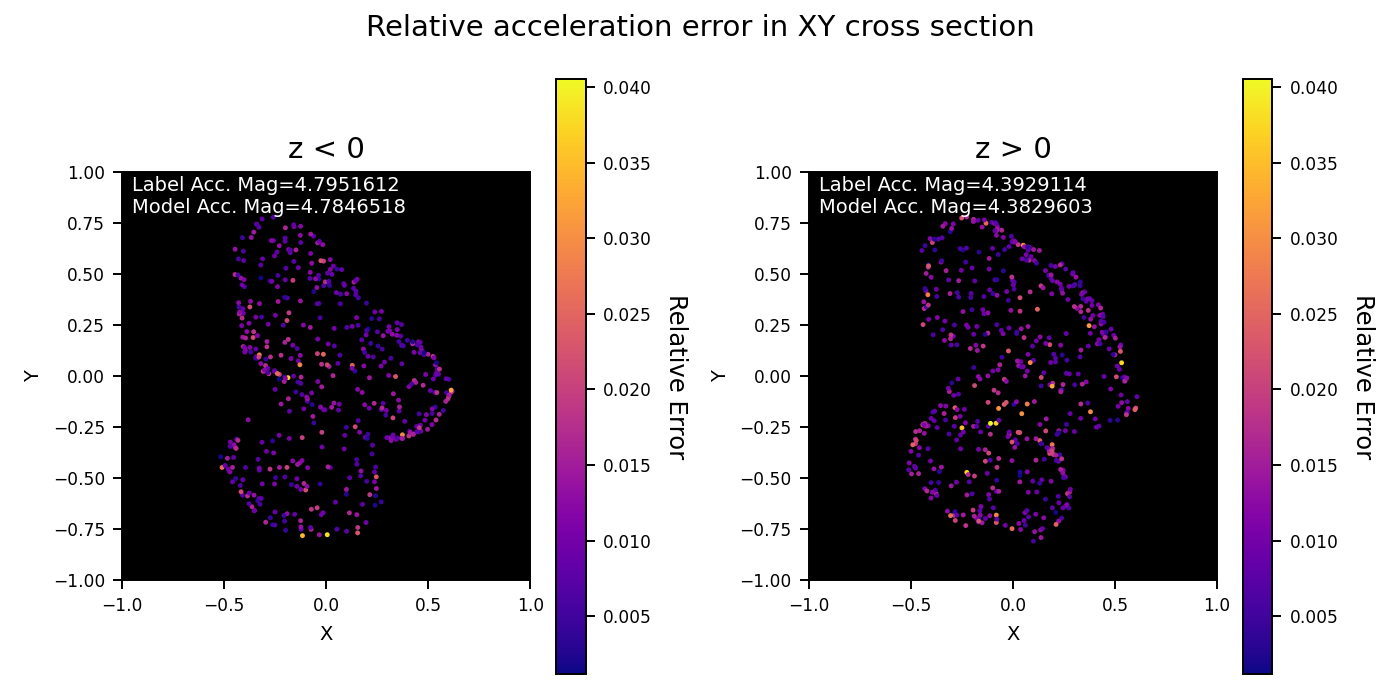

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-2.6972, -1.7923, -0.1932],
         [-1.3476,  1.2703, -2.3604],
         [-2.7420, -0.7167, -1.5513],
         ...,
         [-0.7169,  1.4857, -2.2063],
         [-1.7116,  2.3669, -0.5743],
         [-2.4443, -1.6995, -1.0999]]))

In [6]:
gravann.polyhedral.plot_compare_acceleration(sample,
                                             compare_mode=('mascon', 'polyhedral'),
                                             plane="XY",
                                             N=1000,
                                             logscale=False,
                                             altitude=1e-5)

## Comparing polyhedral model & polyhedral trained NN

In [14]:
# Load polyhedral model
encoding = gravann.direct_encoding()
polyhedral_model = gravann.init_network(encoding, n_neurons=100, model_type="siren", activation = gravann.AbsLayer())

polyhedral_model.load_state_dict(torch.load(f"./models_polyhedral/{sample}_polyhedral_first.mdl"))

polyhedral_c = gravann.compute_c(polyhedral_model, encoding, "polyhedral", mesh_vertices=mesh_vertices, mesh_faces=mesh_faces, density=density, use_acc = True)


Discarding 0 of 14744 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  488  points.
Right:  512  points.


<IPython.core.display.Javascript object>


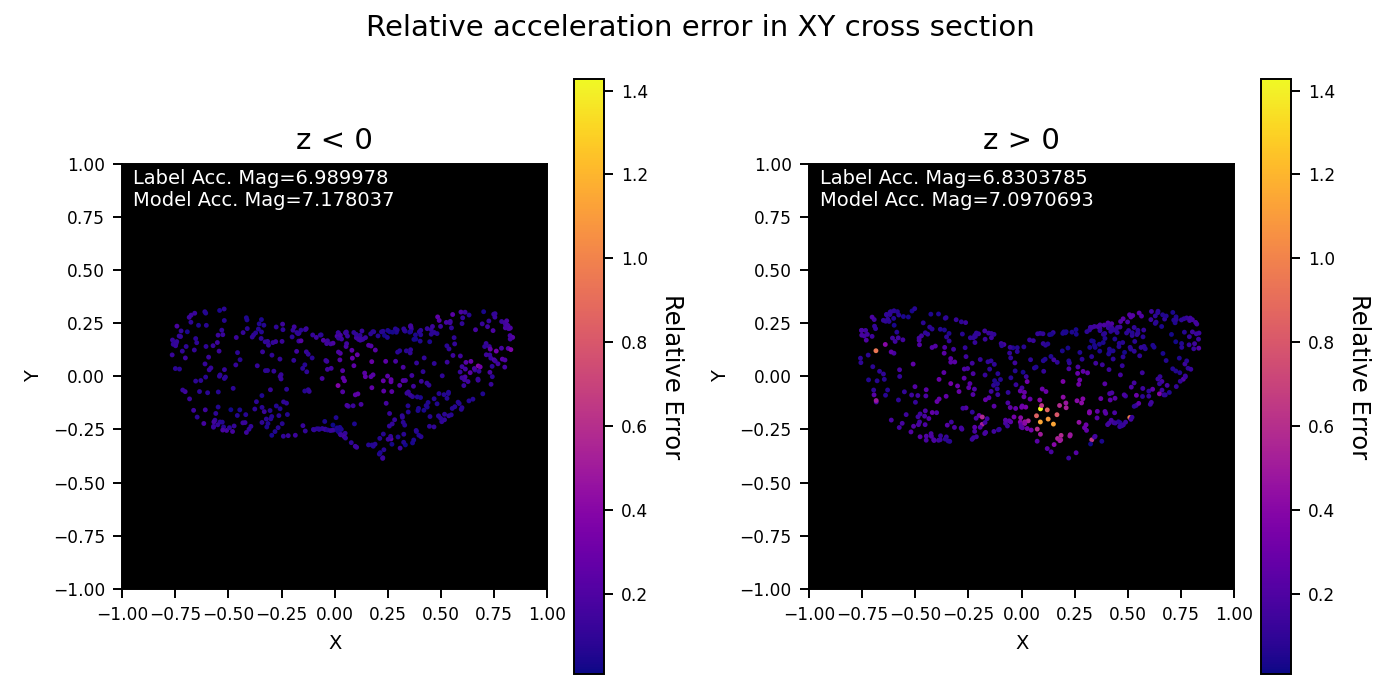

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-2.0844,  1.1574, -4.3760],
         [-1.2165, -2.4239, -3.3689],
         [-1.8666,  4.0605, -2.8142],
         ...,
         [-0.2417,  1.5087, -4.7521],
         [ 3.0380, -2.3602, -1.7655],
         [ 0.6934, -1.7161, -3.7681]]))

In [15]:
gravann.polyhedral.plot_compare_acceleration(sample,
                                             compare_mode=('model', 'polyhedral'),
                                             model_1=(polyhedral_model, encoding, polyhedral_c),
                                             plane="XY",
                                             N=1000,
                                             logscale=False,
                                             altitude=1e-5)

## Comparing polyhedral model & mascon trained NN

In [18]:
# Load mascon model
encoding = gravann.direct_encoding()
mascon_model = gravann.init_network(encoding, n_neurons=100, model_type="siren", activation = gravann.AbsLayer())

mascon_model.load_state_dict(torch.load(f"./models_polyhedral/{sample}_mascon_first.mdl"))

mascon_c = gravann.compute_c(polyhedral_model, encoding, "mascon", mascon_points=mascon_points, mascon_masses=mascon_masses, use_acc = True)


Discarding 0 of 14744 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  465  points.
Right:  535  points.


<IPython.core.display.Javascript object>


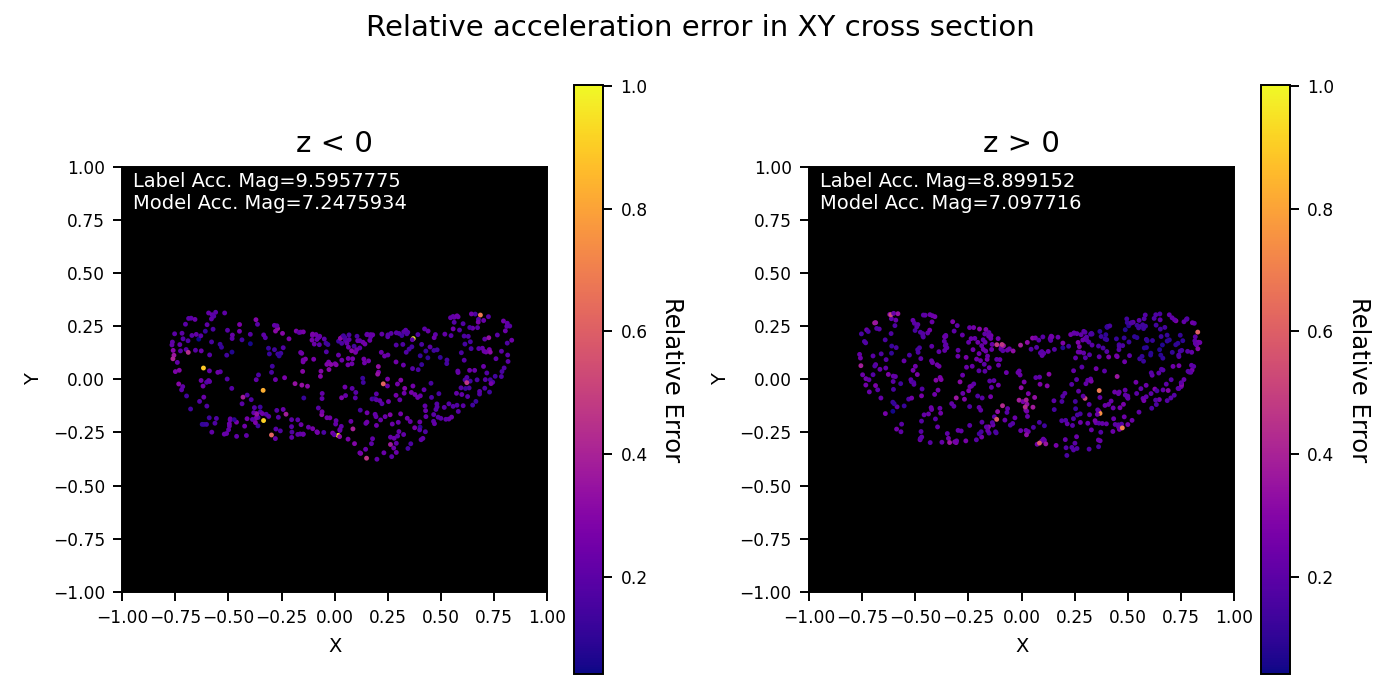

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-1.0208,  5.7039, -2.7551],
         [ 1.7692, -1.7881, -5.2483],
         [-0.1916,  4.1820, -4.7582],
         ...,
         [ 0.1825, -0.0919, -6.3617],
         [ 1.4903,  2.5531, -5.9660],
         [-1.9235,  3.9606, -5.2087]]))

In [20]:
gravann.polyhedral.plot_compare_acceleration(sample,
                                             compare_mode=('model', 'polyhedral'),
                                             model_1=(mascon_model, encoding, mascon_c),
                                             plane="XY",
                                             N=1000,
                                             logscale=False,
                                             altitude=1e-5)

## Comparing polyhedral trained NN & mascon trained NN

Discarding 0 of 14744 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  456  points.
Right:  544  points.


<IPython.core.display.Javascript object>


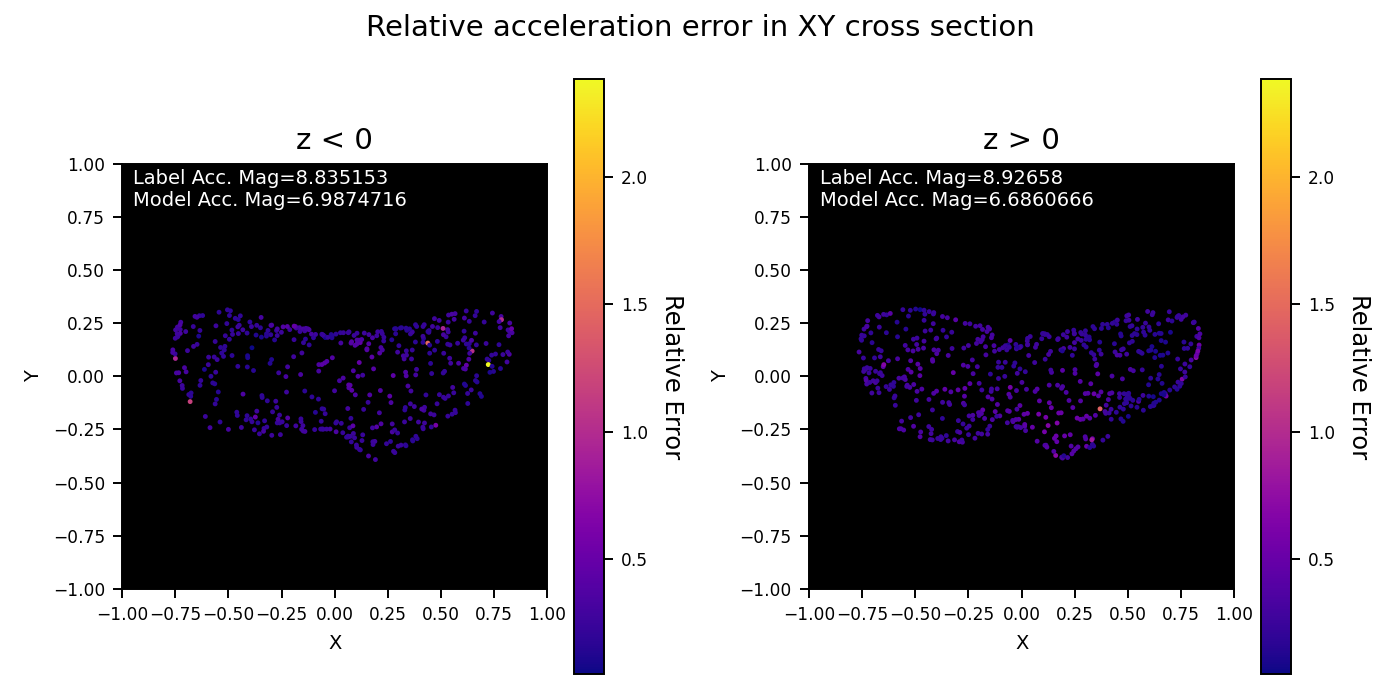

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[ -2.0665,   4.0766,  -4.8118],
         [ -0.3770,  -5.5343,  -1.8547],
         [  1.7699,  -3.2762,  -3.8521],
         ...,
         [  4.2000,   0.1821,  -4.3430],
         [  3.1874,  -2.2677, -10.5809],
         [  0.1086,   5.3690,  -2.4070]]))

In [21]:
gravann.polyhedral.plot_compare_acceleration(sample,
                                             compare_mode=('model', 'model'),
                                             model_1=(mascon_model, encoding, mascon_c),
                                             model_2=(polyhedral_model, encoding, polyhedral_c),
                                             plane="XY",
                                             N=1000,
                                             logscale=False,
                                             altitude=1e-5)